<a href="https://colab.research.google.com/github/Dyinastie/PVCK_3D_Dyinastie/blob/main/PCVK_Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

**Transformasi Linear Brightness**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 80


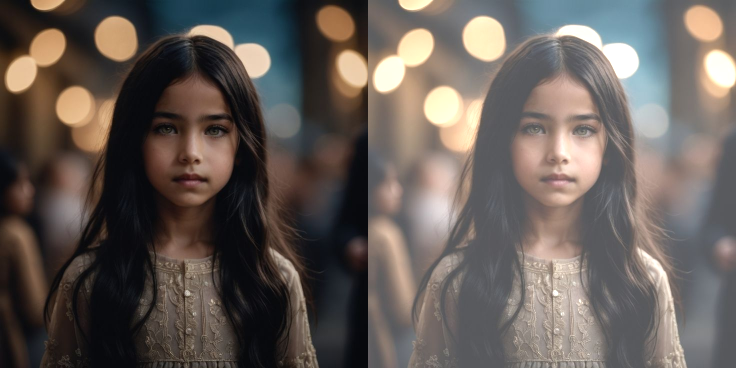

In [ ]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Girl.jpeg')
original = cv.resize(original, (0,0), fx=0.5, fy=0.5)
brigtness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brigtness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simple tanpa loop
# brigness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brigtness_image))
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**

## Soal 1 : Implementasi Invers

Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori.

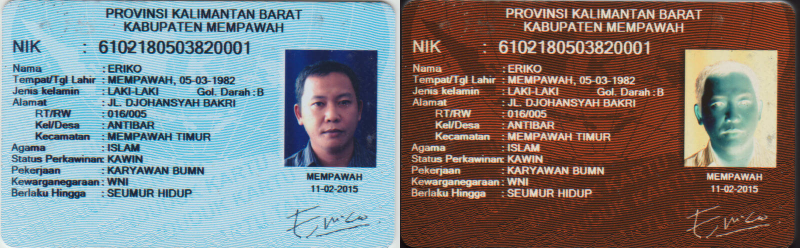

In [3]:
ktp = cv.imread('/content/drive/MyDrive/Images/KTP.jpg')
ktp = cv.resize(ktp, (0,0), fx=0.5, fy=0.5)
invers_image = np.zeros(ktp.shape, ktp.dtype)

# Akses per piksel
for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      invers_image[y,x,c] = np.clip(255 - ktp[y,x,c], 0, 255)

final_frame = cv.hconcat((ktp, invers_image))
cv2_imshow(final_frame)

## Soal 2 : Implementasi Contrast

Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras.

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 -3.0]: 2


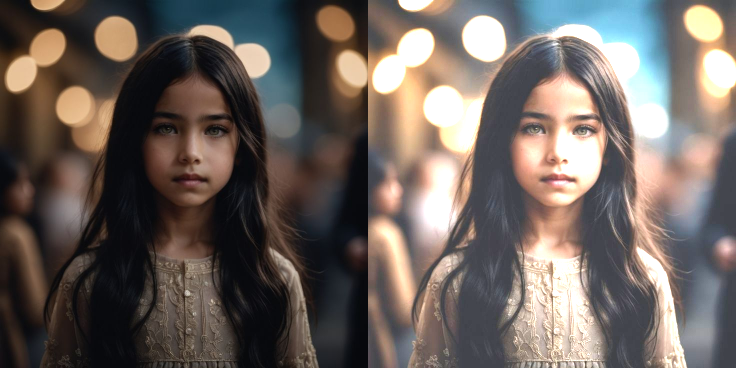

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 -3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Girl.jpeg')
original = cv.resize(original, (0,0), fx=0.5, fy=0.5)

# Inisialisasi array untuk menyimpan gambar hasil transformasi
contrast_brightness_image = np.zeros(original.shape, original.dtype)

# Akses setiap piksel dan terapkan rumus: g(x, y) = a * f(x, y) + b
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_brightness_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Menampilkan gambar asli dan gambar setelah transformasi kontras + kecerahan
final_frame = cv.hconcat((original, contrast_brightness_image))
cv2_imshow(final_frame)

## Soal 3 : Implementasi Transformasi Logarithmic Brighness

Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log.

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


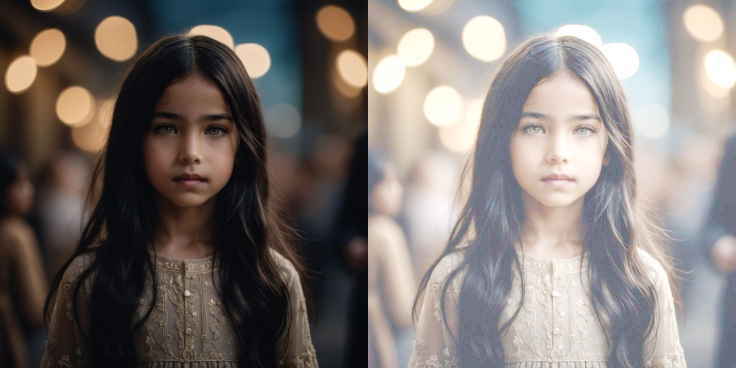

In [4]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/Girl.jpeg')
original = cv.resize(original, (0,0), fx=0.5, fy=0.5)
log_transform_image = np.zeros(original.shape, original.dtype)

# Akses setiap piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            log_transform_image[y, x, c] = np.clip(brightness * np.log(1 + original[y, x, c]), 0, 255)

# Menampilkan gambar asli dan gambar setelah transformasi log
final_frame = cv.hconcat((original, log_transform_image))
cv2_imshow(final_frame)

## Soal 4 : Implementasi Grayscale

Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori.

### Averaging

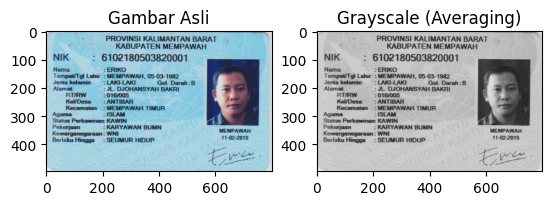

In [5]:
ktp_1 = cv.imread('/content/drive/MyDrive/Images/KTP.jpg')
ktp_1 = cv.cvtColor(ktp_1, cv.COLOR_BGR2RGB)

tinggi = ktp_1.shape[0]
lebar = ktp_1.shape[1]

# Inisialisasi array untuk menyimpan hasil grayscale
grayscale_avg = np.zeros((tinggi, lebar, 3), ktp_1.dtype)

# Akses setiap piksel
for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R = int(ktp_1[y, x, 0])
        G = int(ktp_1[y, x, 1])
        B = int(ktp_1[y, x, 2])
        # Metode Averaging
        average_value = (R + G + B) / 3
        grayscale_avg[y, x] = np.clip(average_value, 0, 255)

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)  # 1 row, 2 columns, posisi 1
plt.imshow(ktp_1)
plt.title('Gambar Asli')

# Subplot 2: Gambar Grayscale (Averaging)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, posisi 2
plt.imshow(grayscale_avg, cmap='gray')
plt.title('Grayscale (Averaging)')

# Menampilkan kedua gambar secara berdampingan
plt.show()

### Lightness

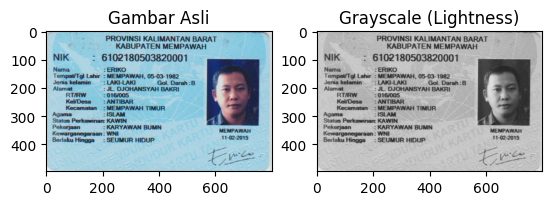

In [6]:
ktp_2 = ktp_1.copy()

tinggi = ktp_2.shape[0]
lebar = ktp_2.shape[1]

# Inisialisasi array untuk menyimpan hasil grayscale
grayscale_lightness = np.zeros((tinggi, lebar, 3), ktp_2.dtype)

# Akses setiap piksel
for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R = int(ktp_2[y, x, 0])
        G = int(ktp_2[y, x, 1])
        B = int(ktp_2[y, x, 2])
        # Metode Lightness
        lightness_value = (np.max([R, G, B]) + np.min([R, G, B])) / 2
        grayscale_lightness[y, x] = np.clip(lightness_value, 0, 255)

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)  # 1 row, 2 columns, posisi 1
plt.imshow(ktp_2)
plt.title('Gambar Asli')

# Subplot 2: Gambar Grayscale (Lightness)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, posisi 2
plt.imshow(grayscale_lightness, cmap='gray')
plt.title('Grayscale (Lightness)')

# Menampilkan kedua gambar secara berdampingan
plt.show()

### Luminance

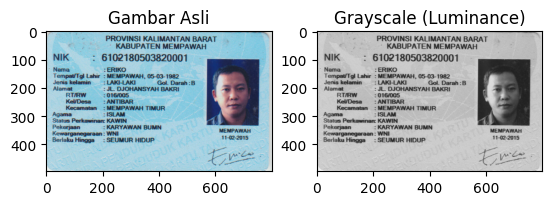

In [7]:
ktp_3 = ktp_1.copy()

tinggi = ktp_3.shape[0]
lebar = ktp_3.shape[1]

# Inisialisasi array untuk menyimpan hasil grayscale
grayscale_luminance = np.zeros((tinggi, lebar, 3), ktp_2.dtype)

# Akses setiap piksel
for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R = int(ktp_3[y, x, 0])
        G = int(ktp_3[y, x, 1])
        B = int(ktp_3[y, x, 2])
        # Metode Luminance
        luminance_value = 0.21 * R + 0.72 * G + 0.07 * B
        grayscale_luminance[y, x] = np.clip(luminance_value, 0, 255)

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)  # 1 row, 2 columns, posisi 1
plt.imshow(ktp_3)
plt.title('Gambar Asli')

# Subplot 2: Gambar Grayscale (Luminance)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, posisi 2
plt.imshow(grayscale_luminance, cmap='gray')
plt.title('Grayscale (Luminance)')

# Menampilkan kedua gambar secara berdampingan
plt.show()

## Soal 5

Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale.

### Hanya menampilkan warna biru

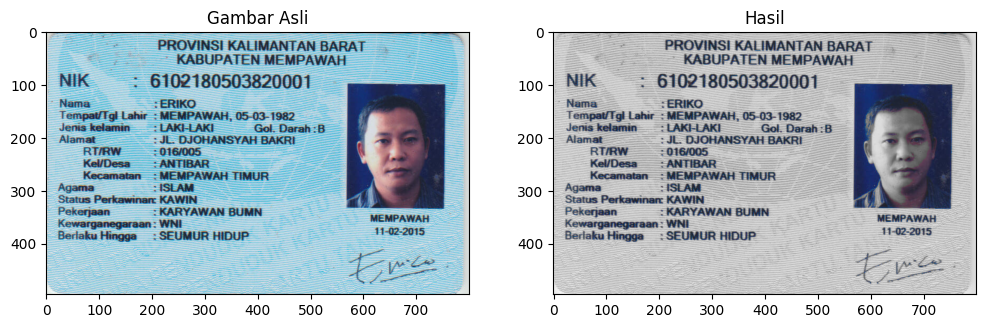

In [14]:
ktp_4 = ktp_1.copy()

tinggi = ktp_4.shape[0]
lebar = ktp_4.shape[1]

# Tentukan batas bawah dan batas atas untuk warna biru dalam format RGB
lower_blue = np.array([0, 0, 50])      # Batas bawah warna biru (R, G, B)
upper_blue = np.array([100, 100, 255])  # Batas atas warna biru (R, G, B)

# Menciptakan area biru
area_biru = cv.inRange(ktp_4, lower_blue, upper_blue)

# Inisialisasi array selain area biru
hasil = np.zeros(ktp_4.shape, ktp_4.dtype)

for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R = int(ktp_4[y, x, 0])
        G = int(ktp_4[y, x, 1])
        B = int(ktp_4[y, x, 2])
        # Cek apakah piksel termasuk dalam area biru
        if area_biru[y, x] > 0:
          hasil[y, x] = [R, G, B]
        else:
          # Gunakan Grayscale (Average)
          abu = (R + G + B) / 3
          hasil[y, x] = np.clip(abu, 0, 255)

# Menampilkan gambar hasil dengan matplotlib
plt.figure(figsize=(12, 6))

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(ktp_4)
plt.title('Gambar Asli')

# Subplot 2: Gambar dengan warna biru dipertahankan
plt.subplot(1, 2, 2)
plt.imshow(hasil)
plt.title('Hasil')

# Menampilkan semua gambar secara berdampingan
plt.show()

### Hanya menampilkan warna pada foto KTP saja

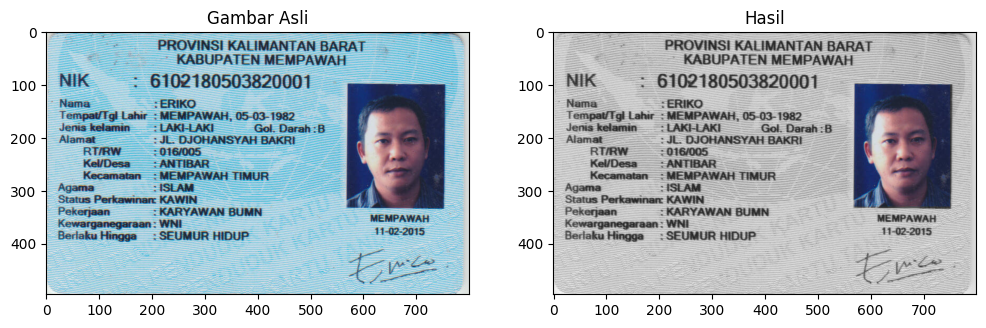

In [16]:
ktp_5 = ktp_1.copy()

tinggi = ktp_5.shape[0]
lebar = ktp_5.shape[1]

# Inisialisasi array
hasil = np.zeros(ktp_5.shape, ktp_5.dtype)

# Tentukan area foto KTP (misal di koordinat x1, y1, x2, y2)
x1, y1 = 570, 100  # Koordinat kiri atas area foto
x2, y2 = 750, 330  # Koordinat kanan bawah area foto

for y in range(tinggi):
    for x in range(lebar):
        # Mendapatkan nilai R, G, B
        R = int(ktp_5[y, x, 0])
        G = int(ktp_5[y, x, 1])
        B = int(ktp_5[y, x, 2])
        # Cek apakah piksel berada di area foto KTP
        if (x1 <= x <= x2 and y1 <= y <= y2):
            # Area foto KTP tetap berwarna
            hasil[y, x] = [R, G, B]
        else:
            # Selain area foto, diubah jadi grayscale
            abu = (R + G + B) / 3
            hasil[y, x] = np.clip(abu, 0, 255)

# Menampilkan gambar hasil dengan matplotlib
plt.figure(figsize=(12, 6))

# Subplot 1: Gambar Asli
plt.subplot(1, 2, 1)
plt.imshow(ktp_5)
plt.title('Gambar Asli')

# Subplot 2: Gambar dengan hanya area foto berwarna
plt.subplot(1, 2, 2)
plt.imshow(hasil)
plt.title('Hasil')

# Menampilkan semua gambar secara berdampingan
plt.show()